In [472]:
from brian2 import *
import matplotlib.pyplot as plt


# **CONTROL**

In [473]:
# Original Variables


parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}


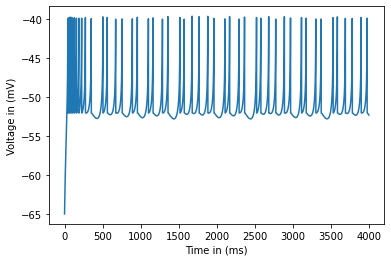

In [474]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

# **Variating the injected current**

### $0,1nA$  

In [475]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

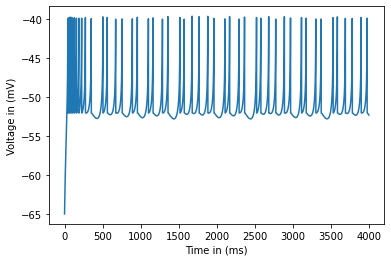

In [476]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $0.5 nA$

In [477]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .5*nA,
}

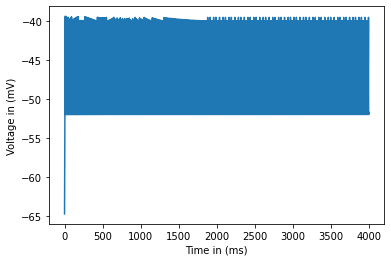

In [478]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $1nA$

In [479]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 1*nA,
}

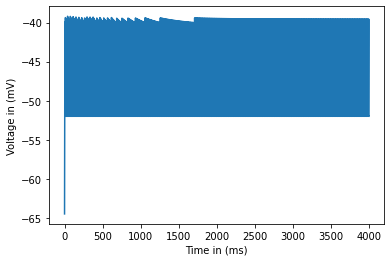

In [480]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5 nA$

In [481]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 5*nA,
}

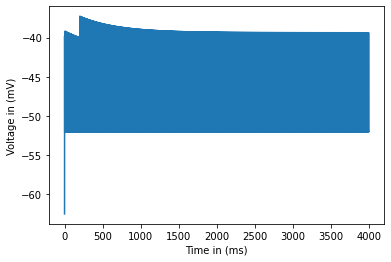

In [482]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10 nA$

In [483]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 10*nA,
}

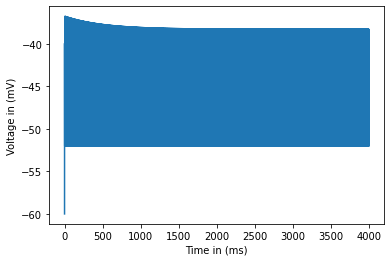

In [484]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

# **Variating values of $a$**

### $1nS$

In [485]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 1.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

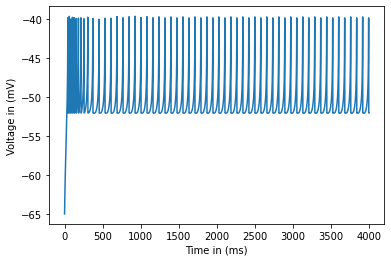

In [486]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $2nS$

In [487]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

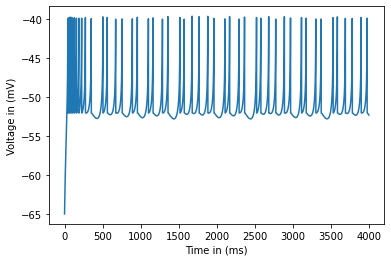

In [488]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5nS$

In [489]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 5.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

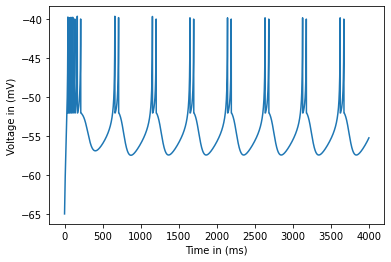

In [490]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10nS$

In [491]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 10.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

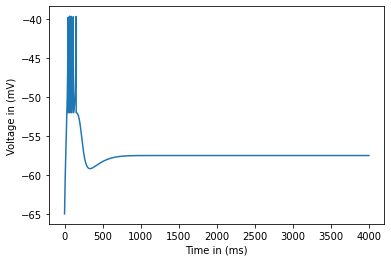

In [492]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

## **Variating the value of $b$**

### $1pA$

In [493]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 1.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

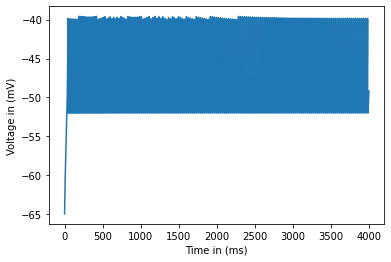

In [494]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5pA$

In [495]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 5.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

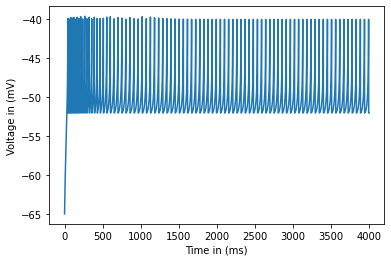

In [496]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### Control $10pA$

In [497]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

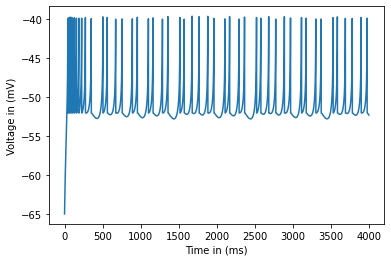

In [498]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $15pA$

In [499]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 15.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

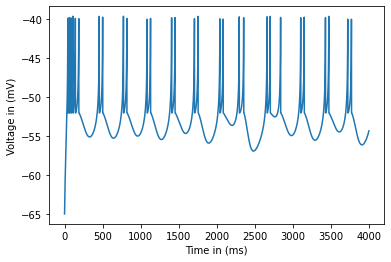

In [500]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $20pA$

In [501]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 20.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

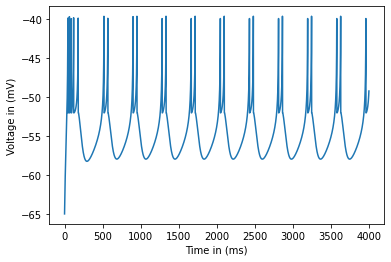

In [502]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

# **Variatung values $tau$**

### $200ms$

In [503]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 200.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

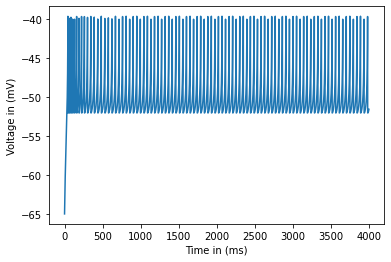

In [504]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $300ms$

In [505]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 300.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

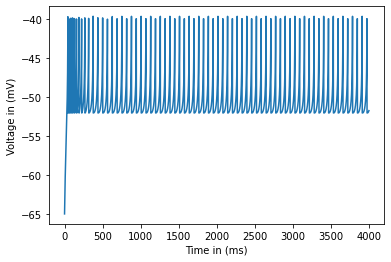

In [506]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $400ms$

In [507]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 400.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

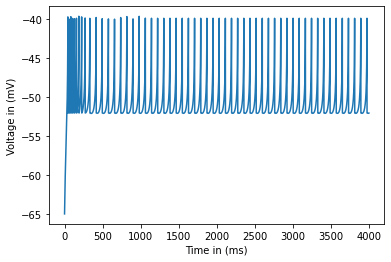

In [508]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $500ms$

In [509]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

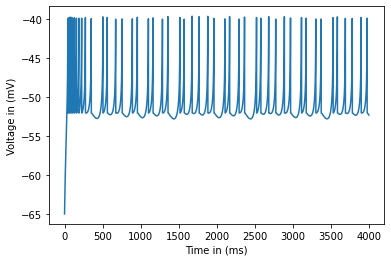

In [510]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $600ms$

In [511]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 600.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

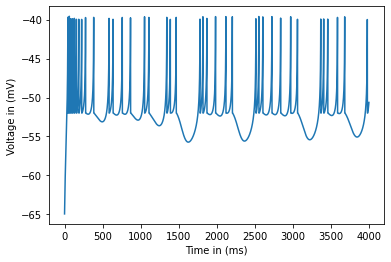

In [512]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $700ms$

In [513]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 700.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

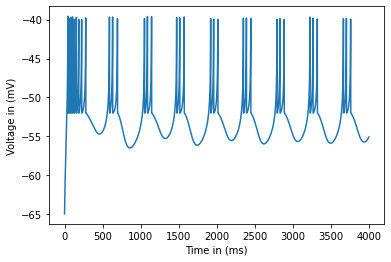

In [514]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $800ms$

In [515]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 800.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

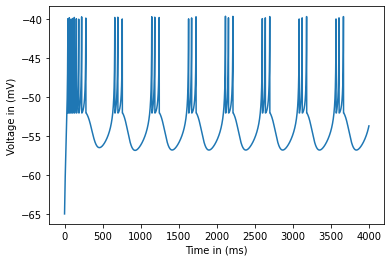

In [516]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $1000ms$

In [517]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 1000.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

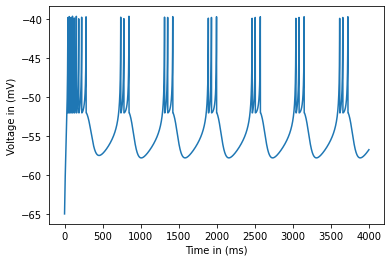

In [518]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()